In [40]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [41]:
pd.read_csv('VWAGY.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,20.139999,20.405001,20.125000,20.395500,19.744776,275000
1,2018-01-03,20.635000,20.750000,20.565001,20.627501,19.969374,254600
2,2018-01-04,21.104000,21.235001,21.010000,21.235001,20.557491,354200
3,2018-01-05,21.455000,21.600000,21.379999,21.600000,20.910847,449400
4,2018-01-08,21.482500,21.610001,21.434999,21.610001,20.920527,479200
...,...,...,...,...,...,...,...
750,2020-12-23,20.500000,20.719999,20.400000,20.690001,20.690001,343100
751,2020-12-24,20.730000,20.850000,20.650000,20.830000,20.830000,124300
752,2020-12-28,20.840000,20.959999,20.799999,20.834000,20.834000,229800
753,2020-12-29,20.889999,20.889999,20.750000,20.820000,20.820000,103700


In [42]:
df = pd.read_csv('VWAGY.csv')

In [43]:
df = pd.read_csv('VWAGY.csv', header =0, parse_dates=[0])

In [44]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,20.139999,20.405001,20.125000,20.395500,19.744776,275000
1,2018-01-03,20.635000,20.750000,20.565001,20.627501,19.969374,254600
2,2018-01-04,21.104000,21.235001,21.010000,21.235001,20.557491,354200
3,2018-01-05,21.455000,21.600000,21.379999,21.600000,20.910847,449400
4,2018-01-08,21.482500,21.610001,21.434999,21.610001,20.920527,479200


In [45]:
df ['t'] = df['Adj Close'].shift(1)

In [46]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,t
0,2018-01-02,20.139999,20.405001,20.125000,20.395500,19.744776,275000,NaN
1,2018-01-03,20.635000,20.750000,20.565001,20.627501,19.969374,254600,19.744776
2,2018-01-04,21.104000,21.235001,21.010000,21.235001,20.557491,354200,19.969374
3,2018-01-05,21.455000,21.600000,21.379999,21.600000,20.910847,449400,20.557491
4,2018-01-08,21.482500,21.610001,21.434999,21.610001,20.920527,479200,20.910847


In [47]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [48]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,t
1,2018-01-03,20.635000,20.750000,20.565001,20.627501,19.969374,254600,19.744776
2,2018-01-04,21.104000,21.235001,21.010000,21.235001,20.557491,354200,19.969374
3,2018-01-05,21.455000,21.600000,21.379999,21.600000,20.910847,449400,20.557491
4,2018-01-08,21.482500,21.610001,21.434999,21.610001,20.920527,479200,20.910847
5,2018-01-09,21.684999,21.735001,21.520000,21.645000,20.954411,264800,20.920527


In [49]:
train_X, train_y = train['t'], train['Adj Close']
test_X, test_y = test['t'], test['Adj Close']

In [50]:
predictions = test_X.copy()

In [51]:
print(predictions)
print(test_y)

748    20.121000
749    19.969999
750    20.049999
751    20.690001
752    20.830000
753    20.834000
754    20.820000
Name: t, dtype: float64
748    19.969999
749    20.049999
750    20.690001
751    20.830000
752    20.834000
753    20.820000
754    20.951000
Name: Adj Close, dtype: float64


In [52]:
df['Resid'] = df['Adj Close'] - df['t']

In [53]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,t,Resid
0,2018-01-02,20.139999,20.405001,20.125000,20.395500,19.744776,275000,NaN,NaN
1,2018-01-03,20.635000,20.750000,20.565001,20.627501,19.969374,254600,19.744776,0.224598
2,2018-01-04,21.104000,21.235001,21.010000,21.235001,20.557491,354200,19.969374,0.588117
3,2018-01-05,21.455000,21.600000,21.379999,21.600000,20.910847,449400,20.557491,0.353356
4,2018-01-08,21.482500,21.610001,21.434999,21.610001,20.920527,479200,20.910847,0.009680


In [54]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [55]:
train.head()

1    0.224598
2    0.588117
3    0.353356
4    0.009680
5    0.033884
Name: Resid, dtype: float64

In [56]:
from statsmodels.tsa.ar_model import AR

In [57]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)
warnings.warn(AR_DEPRECATION_WARN, FutureWarning)

NameError: name 'AR_DEPRECATION_WARN' is not defined

In [58]:
model = AR(train)
model_fit = model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [62]:
model_fit.k_ar

20

In [63]:
model_fit.params

const       -0.002486
L1.Resid    -0.020058
L2.Resid     0.060551
L3.Resid    -0.030398
L4.Resid    -0.012894
L5.Resid     0.039448
L6.Resid    -0.100163
L7.Resid     0.055196
L8.Resid    -0.103580
L9.Resid    -0.002283
L10.Resid    0.022006
L11.Resid   -0.013658
L12.Resid   -0.008116
L13.Resid   -0.022171
L14.Resid   -0.008542
L15.Resid    0.025381
L16.Resid    0.030208
L17.Resid   -0.014028
L18.Resid   -0.041879
L19.Resid   -0.004817
L20.Resid   -0.064558
dtype: float64

In [64]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [65]:
pred_resid

748   -0.085510
749    0.049128
750   -0.035905
751    0.034987
752   -0.112239
753   -0.007659
754   -0.031499
dtype: float64

In [66]:
df.t[df.shape[0]-7:]

748    20.121000
749    19.969999
750    20.049999
751    20.690001
752    20.830000
753    20.834000
754    20.820000
Name: t, dtype: float64

In [67]:
predictions = df.t[df.shape[0]-7:] + pred_resid

In [68]:
predictions

748    20.035490
749    20.019127
750    20.014094
751    20.724988
752    20.717761
753    20.826341
754    20.788501
dtype: float64

In [69]:
print(test_y)

748    19.969999
749    20.049999
750    20.690001
751    20.830000
752    20.834000
753    20.820000
754    20.951000
Name: Adj Close, dtype: float64


In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y,predictions)
mse

0.07329683664974788

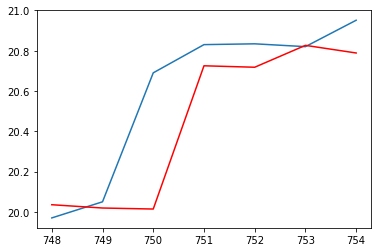

In [72]:
plt.plot(test_y)
plt.plot(predictions, color='red')